In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import pylab as plt
import numpy as np
from matplotlib.ticker import FuncFormatter
from sklearn.decomposition import PCA
#plt.rcParams['figure.figsize'] = (20., 15.)
#plt.rcParams['font.size'] = 20

In [3]:
data = pd.read_csv("data_source/income_GDP_data.csv")
data = data.sort("GDP_PC_WB", ascending=False, na_position='last')
data.index = range(len(data))
numerical_variables = data.keys().tolist()
del numerical_variables[0], numerical_variables[0], numerical_variables[-1]

### We select the countries with most avalaible data

In [36]:
aval_countries = pd.DataFrame(pd.DataFrame(data['code']).join(data[numerical_variables].isnull()).groupby('code', sort=False).sum().sum(axis=1))
aval_countries.columns = ['size']
selected_countries = aval_countries[aval_countries['size']>1940].index
len(selected_countries)
# aval_countries.sort('size', ascending=False).head(15)

50

### We only keep variables available for 10 % of the data

In [37]:
aval_variables = (-data[numerical_variables].isnull().sum() + len(data)) / len(data)
list_var = aval_variables[(aval_variables) > 0.].keys().tolist()
selection = data[list_var + ['code', 'year']]
selection = selection[selection['code'].map(lambda x :x in selected_countries)]
aval_variables[(aval_variables) > 0.1]

gini_DS                0.192145
D1_WB                  0.102862
D9_WB                  0.102862
QU1_WB                 0.102862
QU2_WB                 0.102862
QU3_WB                 0.102862
QU4_WB                 0.102862
QU5_WB                 0.102862
GDP_MP_WB              0.812162
GDP_growth_WB          0.807709
GDP_PC_WB              0.398452
GDP_OECD               0.163309
GDP_CAP_OECD           0.157541
national_income_WID    0.135713
dtype: float64

# Ploting the correlations

In [38]:
inequality = 'gini_DS'
growth = 'national_income_WID'

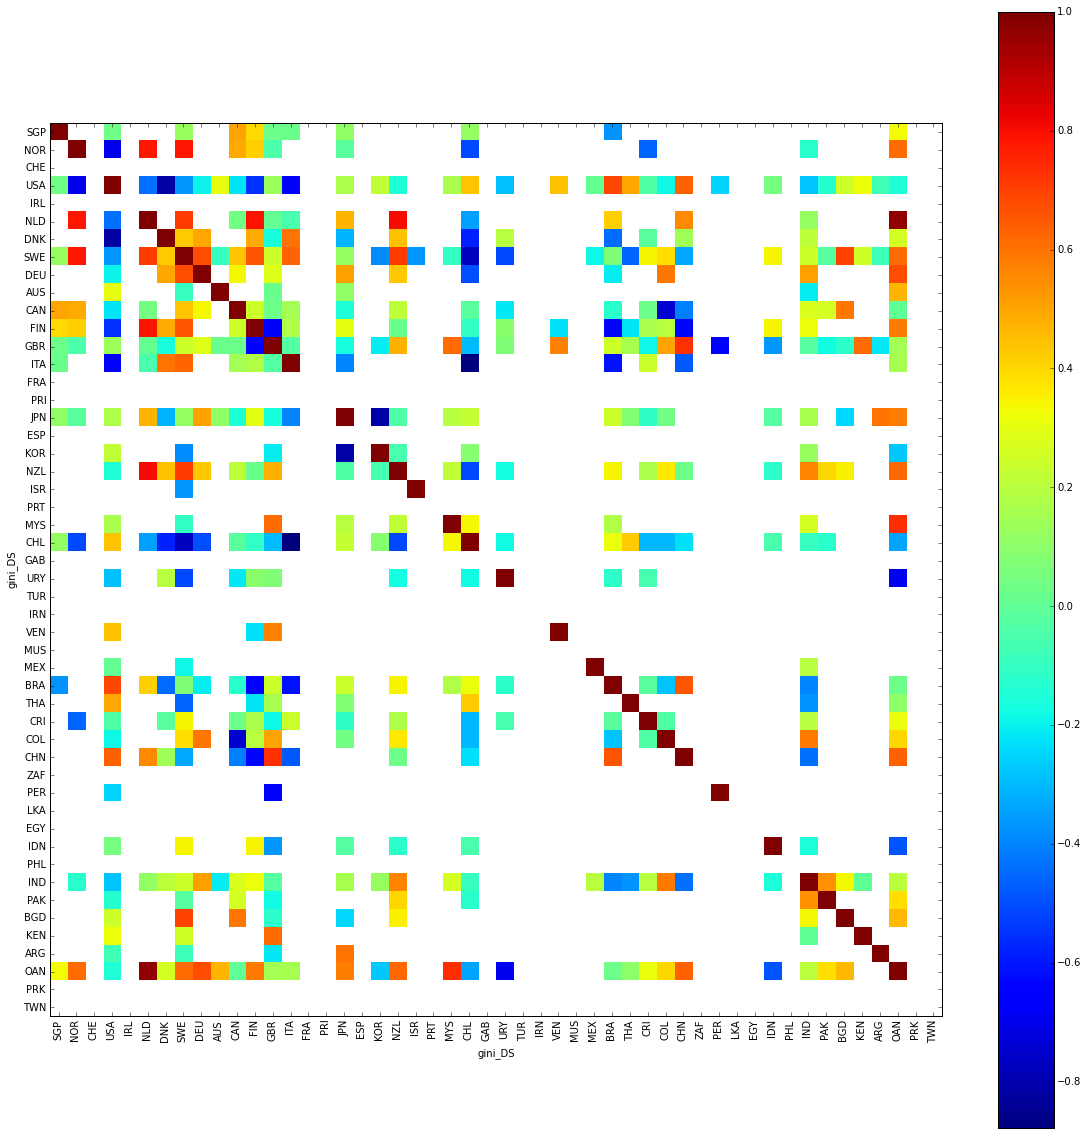

In [50]:
def plot_countries_corr(data, variable):
    square_data = pd.pivot_table(data[[variable, 'code', 'year']], 
                             index='year', columns='code', values=variable)
    square_data = square_data[selected_countries]
    correlations = square_data.corr(min_periods=10)
    fig = plt.figure(figsize=(20,20))
    plt.imshow(correlations, interpolation='nearest')
    plt.xticks(range(0, len(square_data.columns)), square_data.columns, rotation='vertical')
    plt.yticks(range(0, len(square_data.columns)), square_data.columns, rotation='horizontal')
    plt.xlabel(variable)
    plt.ylabel(variable)
    plt.colorbar()

plot_countries_corr(selection, "gini_DS")
plt.savefig("graphs/gini_DS_correlations_between_50_countries.png")

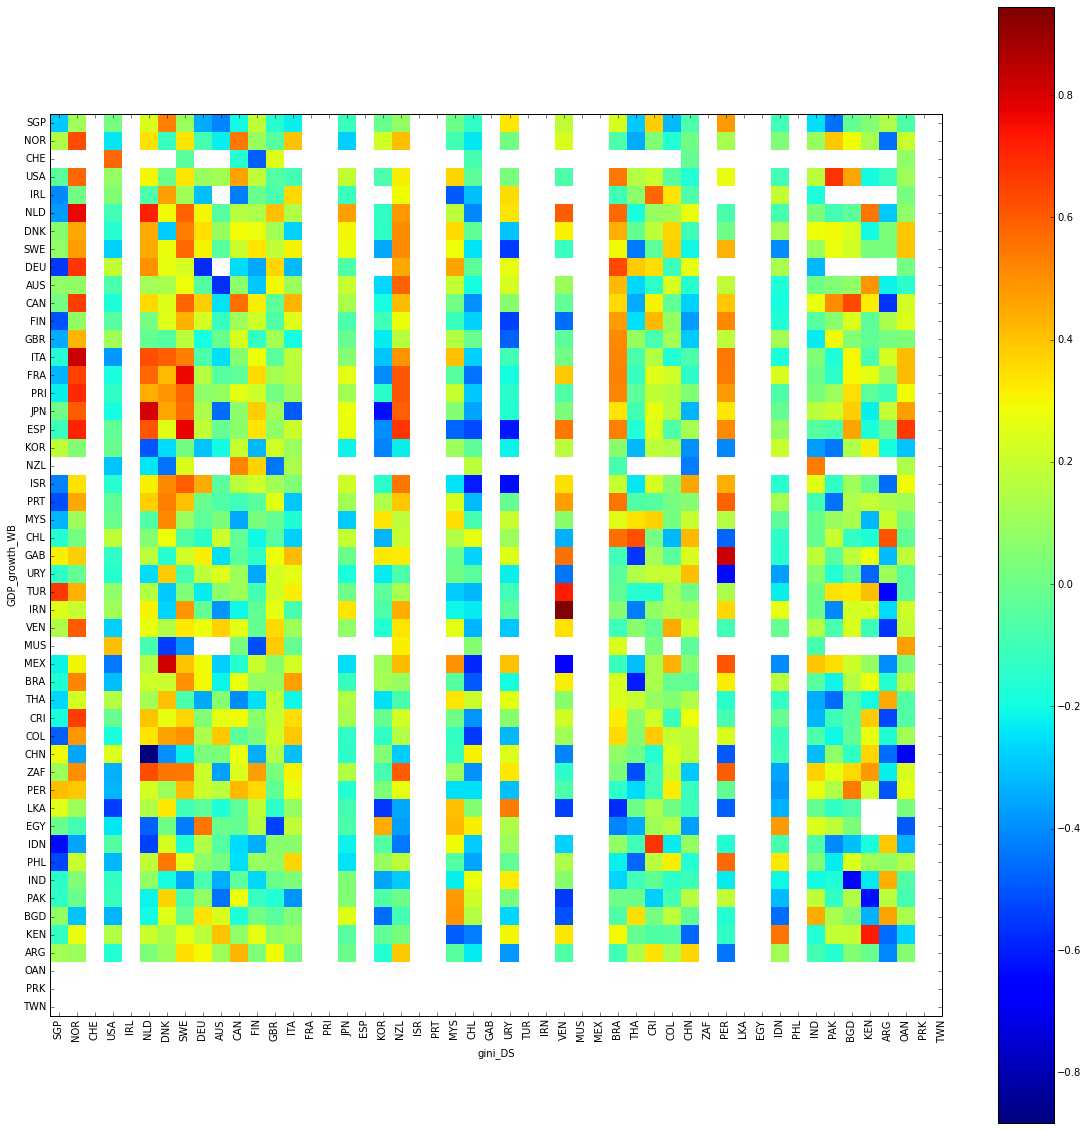

In [47]:
def plot_cov_country(data, var_1, var_2, min_periods=10):
    data_1 = pd.pivot_table(data[[var_1, 'code', 'year']], 
                                 index='year', columns='code', values=var_1)
    data_1 = data_1[selected_countries]
    data_2 = pd.pivot_table(data[[var_2, 'code', 'year']], 
                                 index='year', columns='code', values=var_2)
    data_2 = data_2[selected_countries]
    full_data = pd.concat([data_1, data_2], axis=1)
    corr = full_data.corr(min_periods=min_periods)
    corr
    fig = plt.figure(figsize=(20,20))
    nbr_countries = len(data_1.keys())
    plt.imshow(corr.head(nbr_countries).ix[:,nbr_countries:-1], interpolation='None')
    plt.xticks(range(0, len(data_1.columns)), data_1.columns, rotation='vertical')
    plt.yticks(range(0, len(data_2.columns)), data_2.columns, rotation='horizontal')
    plt.colorbar()
    plt.ylabel(var_1)
    plt.xlabel(var_2)

plot_cov_country(selection, "GDP_growth_WB", "gini_DS")
plt.savefig("graphs/growth_gini_correlations_between_50_countries.png")